# Chapter 7 Object-Oriented Design

from Gayle Laakmann McDowell's "Cracking the Coding Interview", 6th ed. Any mistake or improvements are welcome and feel free to contact [roncwu@gmail.com](mailto:roncwu@gmail.com).

### Ron Wu



## 7.1 play Blackjack
 
This is a complete playable Blackjack game (except I didn't implement the split option). Just run the cell and good luck. One can also use this to testify strategies.

In [1]:
import random 
import time

class deckCards(object):
    def __init__(self):
        self.curIter = 0
        self.deck = [a for a in range(52)]
        self.shuffle()
        
    def shuffle(self):
        random.shuffle(self.deck)
        
    def dealCard(self):
        if self.curIter == 52:
            print "deck is empty"
            return
        card = self.deck[self.curIter]
        self.curIter += 1
        return card 
        
    def cardValSuit(self, card):
        if card/13 == 0:
            return (self.cardFace(card%13+1), "Clubs")
        if card/13 == 1:
            return (self.cardFace(card%13+1), "Diamonds")
        if card/13 == 2:
            return (self.cardFace(card%13+1), "Hearts")
        if card/13 == 3:
            return (self.cardFace(card%13+1), "Spades")
        
    def cardFace(self, card):
        if card == 1:
            return "Ace"
        if card == 11:
            return "Jack"
        if card == 12:
            return "Queen"
        if card == 13:
            return "King"
        return card
             
        
class BlackJack(object):
    def __init__(self, startingBet):
        self.deck = deckCards()
        print "------------ Let's play blackjack ------------"
        self.NewRoundGame(startingBet) 
    
    def NewRoundGame(self, bet):
        if self.deck.curIter > 46:
            print "There are less then 6 cards in the deck. Need to restart the whole game. Type"
            print "A = BlackJack(your_bet)"
            return
    
        player_dealt =  [self.deck.dealCard() , self.deck.dealCard()]
        dealer_dealt = [self.deck.dealCard() , self.deck.dealCard()]
        
        #dealer_dealt[0] = 0
        #dealer_dealt[1] = 5  # change values here for testing purposes
        
        print "\nYour Bet:"
        print  bet , "dollars" 
        time.sleep(2) 
        print "\nYour 2 draws: " 
        print self.deck.cardValSuit(player_dealt[0]), self.deck.cardValSuit(player_dealt[1])
        time.sleep(2)
        print "\nDealer one face-up card: " 
        print self.deck.cardValSuit(dealer_dealt[0])   
        time.sleep(1)
        
        insurance = -1 
        if (dealer_dealt[0]%13 == 0):  
            print "\nWhen dealer gets Ace, you can buy insurance."
            print "You can buy upto" , bet/2, "dollars"
            print "\nEnter 0 if you don't want insurance"
            
            while insurance < 0 or insurance > bet/2:
                insurance = int(raw_input('Enter insurance amount:'))
                
            time.sleep(2)
            if (insurance > 0 and insurance <= bet/2):
                if (dealer_dealt[1]%13+1 >= 10):
                    print "\nDealer is blackjack. You get your insurance momey:" ,insurance*2
                    if self.dealVal(player_dealt)==21:
                        print "You are blackjock too. So it is a draw (push). You get your bet back."
                    else:
                        print "But you lost your bet", bet, "dollors"
                    return
                print "\nDealer is not a blackjack. You lost your insurance money, but the game is still on."
                
            
        time.sleep(1)
        choice = 2
        numHit = 0
        
        while choice == 2:
            print "\nEnter the number:"
            print "1: Stand"
            print "2: Hit"
            print "3: Double"

            #Split is not implemented  
            #if player_dealt[0]%13 == player_dealt[1]%13: 
                # print "4: Split"
                
            if choice == 2: 
                choice = 0
        
            while choice != 1 and choice != 2 and choice !=3:
                choice = int(raw_input('Enter your choice:')) 

            time.sleep(1)
            
            if choice == 2: 
                numHit += 1
        
        
            if (choice == 2 or choice == 3): 
                player_dealt.append(self.deck.dealCard())
                if choice == 3:
                    print "\nYour one and only one double draw: "   
                elif numHit == 1:
                    print "\nYour third draw: " 
                elif numHit == 2:
                    print "\nYour fourth draw: "
                elif numHit == 3:
                    print "\nYour fifth draw: "  
                elif numHit == 4:
                    print "\nYour sixth draw: "   
                else:
                    print "\nYour next draw: "   
                print self.deck.cardValSuit(player_dealt[-1]) 

            if choice == 3:
                bet = bet * 2
                print "\nYou doubled your initial bet. The new bet is " , bet

            time.sleep(1)   
                
            if self.isBusted(player_dealt)[0]==True:
                print "\nYour total:", self.isBusted(player_dealt)[1]
                print "You are busted. You lost" , bet, "dollars"
                print "\nWant another round? Type \nA.NewRoundGame(your_bet)"
                return

        print "\nDealer hole card was:"
        print self.deck.cardValSuit(dealer_dealt[1])
        
        time.sleep(1)
        firstTime = True
        while self.dealValSoft(dealer_dealt) <= 16: # this means hit on soft17
            dealer_dealt.append(self.deck.dealCard())
            if firstTime == True:
                print "\nIf dealer total is less or equal to 16, dealer must hit and stand on hard 17 or more."
                firstTime = False
            time.sleep(2)  
            print "\nDealer next draw: " 
            print self.deck.cardValSuit(dealer_dealt[-1])
            
        deal_val = self.dealVal(dealer_dealt)    
        player_val = self.dealVal(player_dealt)
        
        if self.isBusted(dealer_dealt)[0]==True:
            print "\nDealer total:", self.isBusted(dealer_dealt)[1]
            print "\nDealer is busted. You win" ,bet*2 , "dollars\n"
            time.sleep(1)  
            print "\nWant another round? Type \nA.NewRoundGame(your_bet)"
            return
        
        time.sleep(1)
        print "\nYour total:", player_val
        print "Dealer total:", deal_val
        
        time.sleep(1)
        if deal_val > player_val:
            print "You lost your bet", bet, "dollars."
        elif deal_val < player_val:
            print "You win the bet:" , bet*2,  "dollars rewards."
        else:
            print "It was a push. You get your bet", bet,"dollars back."
        
        time.sleep(1)    
        print "\nWant another round? Type \nA.NewRoundGame(your_bet)"
        
    def isBusted(self, deal):
        total = 0
        for d in deal: 
            total += min(10, d%13+1) 
        return [total > 21, total]
     
    
    def dealVal(self, dealt):
        val = 0
        Ace = False
        for d in dealt:
            val += min(10, d%13+1) 
            if d%13 == 0:
                Ace = True
        if Ace == True and val + 10 <= 21:
            val += 10 
        return val
    
    def dealValSoft(self, dealt):
        val = 0  
        for d in dealt:
            val += min(10, d%13+1)   
        if dealt[0]%13 == 0 and val >= 8:  #hit soft 17, stand soft 18 
            return val + 10 
        return val

In [2]:
A = BlackJack(10)

------------ Let's play blackjack ------------

Your Bet:
10 dollars

Your 2 draws: 
(8, 'Hearts') ('Jack', 'Diamonds')

Dealer one face-up card: 
(6, 'Spades')

Enter the number:
1: Stand
2: Hit
3: Double
Enter your choice:1

Dealer hole card was:
('Queen', 'Clubs')

If dealer total is less or equal to 16, dealer must hit and stand on hard 17 or more.

Dealer next draw: 
(7, 'Hearts')

Dealer total: 23

Dealer is busted. You win 20 dollars


Want another round? Type 
A.NewRoundGame(your_bet)


In [3]:
A.NewRoundGame(100)


Your Bet:
100 dollars

Your 2 draws: 
(2, 'Diamonds') (7, 'Diamonds')

Dealer one face-up card: 
('Jack', 'Clubs')

Enter the number:
1: Stand
2: Hit
3: Double
Enter your choice:2

Your third draw: 
(3, 'Diamonds')

Enter the number:
1: Stand
2: Hit
3: Double
Enter your choice:2

Your fourth draw: 
(8, 'Clubs')

Enter the number:
1: Stand
2: Hit
3: Double
Enter your choice:1

Dealer hole card was:
('Jack', 'Hearts')

Your total: 20
Dealer total: 20
It was a push. You get your bet 100 dollars back.

Want another round? Type 
A.NewRoundGame(your_bet)


## 7.2 customer call center

This is a simple workable program for call centers. One can use this to find an optimal scheduling for hiring manager to determine the number of representatives they need during peak hours. 

In [4]:
import random
import time 

class Customer(object):
    def __init__(self, ID, callInTime, duration):
        self.ID = ID
        self.callInTime = callInTime
        self.duration = duration
        
class CustomerRep(object): 
    isBusy = False  
    rank = 0
    startTime = -1
    hangUpTime = -1
    customer = None

    def __init__(self, EmployeeID):
        self.ID = EmployeeID

    def takeCall(self, customer, startTime):
        self.isBusy = True
        self.startTime = startTime
        self.hangUpTime = startTime + customer.duration
        self.customer = customer

    def hangUp(self):
        startTime = -1
        hangUpTime = -1
        self.isBusy = False  
        self.customer = None 

class callCenter(object):
    
    def __init__(self): 
        self.director = [CustomerRep("Dir1")]
        self.manager = [CustomerRep("Mag1"),CustomerRep("Mag2")]
        self.rep = [CustomerRep("Rep1"), CustomerRep("Rep2"), CustomerRep("Rep3")] 
    
    def availability(self):
        #return the first available agent
        for e in [self.rep, self.manager, self.director]:  
            random.shuffle(e)
            for a in e:
                if a.isBusy == False:
                    return a
        return False
        

class simulation(): 
    
    def __init__(self):
        
        self.ccallin = [] 
        for i in range(1, 21):
            self.ccallin.append(Customer(i, random.randint(1,10), random.randint(1,5))) 
        self.ccallin.sort(key=lambda x: x.callInTime, reverse = True)  # this creats a queue
        
        self.ccenter = callCenter()
        self.time = 0 
        
    def run(self):      # home-made observable pattern 
        
        print "------------ call center is open ------------ "
        for t in range(16):  #simulation run for 15 minutes
            print "\nCurrent time is", t, "min past noon" 
            for e in [self.ccenter.rep, self.ccenter.manager, self.ccenter.director]:   
                for a in e:
                    if a.hangUpTime == t:
                        print " *", a.ID, "is done with client", a.customer.ID
                        a.hangUp() 
                        
            for e in [self.ccenter.rep, self.ccenter.manager, self.ccenter.director]:   
                for a in e:
                    if a.hangUpTime > t:
                        print " -", a.ID, "is still with client", a.customer.ID
           
            
            while self.ccallin != [] and self.ccallin[-1].callInTime <= t:
                if self.ccenter.availability() == False:
                    print "\n ! All rep are busy. Client", self.ccallin[-1].ID, "etc are on hold."
                    break
                else:
                    ag = self.ccenter.availability() 
                    print " @", ag.ID, "starts talking to client", self.ccallin[-1].ID
                    ag.takeCall(self.ccallin.pop(), t)
                    
            time.sleep(2)


In [5]:
A = simulation()
A.run()

------------ call center is open ------------ 

Current time is 0 min past noon

Current time is 1 min past noon

Current time is 2 min past noon
 @ Rep1 starts talking to client 20
 @ Rep2 starts talking to client 12

Current time is 3 min past noon
 - Rep2 is still with client 12
 - Rep1 is still with client 20
 @ Rep3 starts talking to client 1

Current time is 4 min past noon
 * Rep1 is done with client 20
 * Rep3 is done with client 1
 - Rep2 is still with client 12

Current time is 5 min past noon
 - Rep2 is still with client 12

Current time is 6 min past noon
 - Rep2 is still with client 12
 @ Rep1 starts talking to client 18
 @ Rep3 starts talking to client 13
 @ Mag1 starts talking to client 2

Current time is 7 min past noon
 * Rep1 is done with client 18
 * Rep2 is done with client 12
 - Rep3 is still with client 13
 - Mag1 is still with client 2
 @ Rep2 starts talking to client 15
 @ Rep1 starts talking to client 10
 @ Mag2 starts talking to client 7
 @ Dir1 starts talking

## 7.3 iTunes playlist

This is a typical menu program with read/write to text file. It is so typical that all first year cs students have to master.

In [6]:
# load pre-designed playlist of my favorite show "Left of the Dial" from Wbar, Barnard College Radio 
# the list is courtesy of DJ: IK, HHS, "Left of the Dial Episode #1", on air 2-4am Feb 7, 2014
# http://www.wbar.org/shows/S14/Left%20of%20the%20Dial/memory-7/
import time

class playlist(object):
    
    preList = 'data/preList.txt'
    userList = 'data/userList.txt'
    songList = None
    
    def __init__(self):
        print "------------ welcome to iPlaylist ------------\n"
        self.intial = True
        self.menu()
    
    def menu(self): 
        if self.intial == False:
            print "\n\n------------ Main Menu ------------"
        self.intial = False
        print " 1: play myList" 
        print " 2: edit myList"
        print " 3: play pre-stored list: Left of the Dial"
        print " 4: exit"
        choice = -1
        while choice != '4' and choice != '1' and choice != '2' and choice != '3':
            choice = raw_input("Enter a number: ")
        if choice == '4':
            print "\n------------ Bye Come Back Often ------------"
            return
        elif choice == '3':
            self.songList = self.loadSongList(self.preList)
            print "\nNow playing: "
            self.playList(self.songList, 1) 
        elif choice == '1':  
            self.songList = self.loadSongList(self.userList)
            print "\nNow playing: "
            self.playList(self.songList, 1)
        elif choice == '2':
            self.songList = self.loadSongList(self.userList)
            self.menuEdit()
        self.menu()
            
    def menuEdit(self):
        print "\n------------ Edit Menu ------------"
        print " 1: add a song"  
        if len(self.songList) > 0: 
            print " 2: remove a song"
            print " 3: edit a song"
        print " 0: return to main menu"
        choice = -1
        while choice != '0' and choice != '1' and choice != '2' and choice != '3':
            choice = raw_input("Enter a number: ")
        if choice == '0':
            return
        if choice == '3':  
            self.playList(self.songList, 0) 
            numSong = -1
            while numSong <1 or numSong> len(self.songList):
                try:
                    numSong = int(raw_input("Enter the number of song to be edited: ")) 
                except ValueError:
                    pass
            print "\nDon't want to change? Just hit enter without typing anything."     
            name = raw_input("\nChange the song name: \'%s\' " %self.songList[numSong-1].song) or self.songList[numSong-1].song
            artist = raw_input("Change the artist: \'%s\' " %self.songList[numSong-1].artist) or self.songList[numSong-1].artist
            album = raw_input("Change the album: \'%s\' " %self.songList[numSong-1].album) or self.songList[numSong-1].album
            label = raw_input("Change the label: \'%s\' " %self.songList[numSong-1].label) or self.songList[numSong-1].label 
            self.songList[numSong-1] = song([name, album, label])
    
        elif choice == '1':    
            name = raw_input("\nAdd song name: ")
            artist = raw_input("Add artist: ") 
            album = raw_input("Add album: ")
            label = raw_input("Add label: ")
            self.songList.append(song([name, artist, album, label]))
    
        elif choice == '2': 
            self.playList(self.songList, 0) 
            numSong = -1
            while numSong <1 or numSong> len(self.songList):
                try:
                    numSong = int(raw_input("Enter the ID of song to be removed: ")) 
                except ValueError:
                    pass
            del self.songList[numSong-1]
        
        self.writeUserList(self.userList, self.songList)
        self.menuEdit() 

    def playList(self, songList, delay):
        if len(songList) == 0:
            print "The list is empty!"
            return
        print "\nID | song | artist | album"
        for idx, s in enumerate(songList):
            print idx+1,"|",s.song, "|", s.artist, "|", s.album
            time.sleep(delay)
        
    def loadSongList(self, fileName):  
        songList = []
        with open(fileName, 'r') as f:
            prelist = f.read() 
        for i in prelist.split("\n"): 
            if i != '': 
                songList.append(song(i.split("\t")))   
        return songList

    def writeUserList(self, fileName, songList):
        with open(fileName, 'w') as f:
            for l in songList:
                s = "\t".join([l.song, l.artist, l.album, l.label]) + "\n"
                f.write(s) 

class song(object):
    def __init__(self, info): 
        self.song = info[0]
        self.artist = info[1]
        self.album = info[2]
        self.label = info[3]
         

In [7]:
C = playlist()

------------ welcome to iPlaylist ------------

 1: play myList
 2: edit myList
 3: play pre-stored list: Left of the Dial
 4: exit
Enter a number: 3

Now playing: 

ID | song | artist | album
1 | Looks | Student Teachers | 2X5
2 | Little Fury Things | Dinosaur Jr. | You're Living All Over Me
3 | Rotterdam | The Wedding Present | Seamonsters
4 | Vanessa From Queens | Stephen Malkmus & The Jicks | Pig Lib
5 | Machine Gun | Slowdive | Souvlaki
6 | Unsatisfied | The Replacements | Let It Be
7 | Always Pretty | Princess Reason | Always Pretty EP
8 | Lovesick | Orange Juice | The Glasgow School
9 | Operator | Honest John Plain | Honest John Plain & Friends
10 | Life's A Gas | T. Rex | Electric Warrior
11 | Soft Serve | Soul Coughing | Irresistible Bliss
12 | Nobody There | Veronica Falls | Nobody There
13 | Brother Bryan | Waxahatchee | Cerulean Salt
14 | Let's Go Away | Rocketship | A Certain Smile, A Certain Sadness
15 | Steaming Train | Talulah Gosh | Backwash
16 | Pristine Christine | T

## 7.4 parking lot

This is similar to 7.2 call center program.

In [8]:
import random

vehicleTypes = ["Sedan", "Van", "Electric", "Self-Drive"]

class vehicle(object):
    def __init__(self, license):
        self.ID = license 
        
class lot(object):
    def __init__(self, lotID):
        self.lotID = lotID 
        
class parkingLot(object):
    def __init__(self):
        self.carInPark = {}
        self.lotSpace = {}
        for i in range(1,10):
            self.lotSpace[i] = "avail" 
    
    def Parking(self, car, curTime):
        availLot = self._Availability(car, curTime) 
        if  availLot == False:
            print " ! Sorry the parking lot is full!"
            return False
        print " * car "+str(car.ID) + " is entering the garage, should go to lot_" +str(availLot)
        self.carInPark[car.ID] = (availLot, curTime)
        self.lotSpace[availLot] = "not avail" 
        return True
        
    
    def Departing(self, car, curTime):
        if car.ID not in self.carInPark:
            print "\n ! No such car in the parking lot"
            return 
        self._PriceLookUP(car, curTime)
        self.lotSpace[self.carInPark[car.ID][0]] = "avail"
        del self.carInPark[car.ID]
         
    
    def _PriceLookUP(self, car, curTime):
        print " - car", car.ID,"is leaving. \n $$$ It was here from", 
        print self.carInPark[car.ID][1], "o'clock to", curTime,"o'clock.",
        print "Parking fee:", (curTime - self.carInPark[car.ID][1]) * 6.99, "dollars.\n"
    
    def _Availability(self, car, curTime):
        for lotID, aval in self.lotSpace.iteritems():  
            if aval == "avail": 
                return lotID
        return False


In [9]:

A = parkingLot()
license = ["A34","B245","D25","T23", "J367","W24","H35","V26","N75"]
parked = []

for t0 in range(1,11): #simulation of time
    print "current time is", t0,"o'clock\n"
   
    if t0 > 2 and len(parked)>=1:
        random.shuffle(parked)
        r = random.randint(0, len(parked)-1)
        for i in range(r):
            C = vehicle(parked.pop()) 
            A.Departing(C, t0) 
            
    random.shuffle(license)
    r = random.randint(0, 5)
    for i in range(r):
        if license[i] not in parked:
            C = vehicle(license[i])  
            if A.Parking(C, t0) == True:
                parked += [license[i]] 
    print 


current time is 1 o'clock

 * car H35 is entering the garage, should go to lot_1

current time is 2 o'clock


current time is 3 o'clock

 * car A34 is entering the garage, should go to lot_2

current time is 4 o'clock

 * car W24 is entering the garage, should go to lot_3
 * car N75 is entering the garage, should go to lot_4

current time is 5 o'clock


current time is 6 o'clock

 - car W24 is leaving. 
 $$$ It was here from 4 o'clock to 6 o'clock. Parking fee: 13.98 dollars.

 * car V26 is entering the garage, should go to lot_3
 * car D25 is entering the garage, should go to lot_5

current time is 7 o'clock

 - car A34 is leaving. 
 $$$ It was here from 3 o'clock to 7 o'clock. Parking fee: 27.96 dollars.

 - car H35 is leaving. 
 $$$ It was here from 1 o'clock to 7 o'clock. Parking fee: 41.94 dollars.

 * car H35 is entering the garage, should go to lot_1

current time is 8 o'clock

 - car H35 is leaving. 
 $$$ It was here from 7 o'clock to 8 o'clock. Parking fee: 6.99 dollars.

 - c

## 7.5 online book reader

We will use google book API. https://developers.google.com/books/

In [10]:
import requests 

def searchBook(book):
        url = "https://www.googleapis.com/books/v1/volumes?q=" + str(book)
        response = requests.get(url).json() 
        for i in range(min(response["totalItems"],10)):  
            print response["items"][i]["volumeInfo"]["title"]
            if "authors" in response["items"][i]["volumeInfo"]: 
                print ", ".join(response["items"][i]["volumeInfo"]["authors"])  
            if "webReaderLink" in response["items"][i]["accessInfo"]:
                print response["items"][i]["accessInfo"]["webReaderLink"]
            print
            
searchBook("The Histories") #type any book title here, return top 10 results

The Histories
Polybius
http://books.google.com/books/reader?id=NWdiAAAAMAAJ&hl=&printsec=frontcover&output=reader&source=gbs_api

The Histories
Herodotus
http://books.google.com/books/reader?id=vk4lEVdmswMC&hl=&printsec=frontcover&output=reader&source=gbs_api

Tacitus, The Histories
Cornelius Tacitus
http://books.google.com/books/reader?id=dYJfAAAAMAAJ&hl=&printsec=frontcover&output=reader&source=gbs_api

The Histories
Agathias
http://books.google.com/books/reader?id=PqsJZcQR7oIC&hl=&printsec=frontcover&output=reader&source=gbs_api

Polybius
http://books.google.com/books/reader?id=UaENN3WvxI0C&hl=&printsec=frontcover&output=reader&source=gbs_api

The Histories of Herodotus
Herodotus
http://books.google.com/books/reader?id=QsIcxGrq6QAC&hl=&printsec=frontcover&output=reader&source=gbs_api

A Cursing Brain? The Histories of Tourette Syndrome
Howard I. Kushner
http://books.google.com/books/reader?id=9dQEB_MbhKEC&hl=&printsec=frontcover&output=reader&source=gbs_api

The Landmark Herodotus
R

## 7.6 jigsaw

## 7.7 chat service

This is a complete runnable Python low-level socket interface program. Client 1 sends message to client 2 via a server. For more, read Computer Network: IP, Packet Switching, Routing

In [11]:
import socket
import sys
import threading 

class serverThread(threading.Thread):
    def run(self):  
         
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM) 
        
        # this tells the kernel to reuse a local socket in TIME_WAIT state, 
        # without waiting for its natural timeout to expire.
        sock.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
        
        server_address = ('localhost', 20016)  
        sock.bind(server_address)
        print "starting server..."
 
        sock.listen(1) 
        data = None
        address =[]
        
        while True:  
            connection, client_address = sock.accept() #the thread will freeze until a new connection is in
            print 'new connection'
            print 'conn name:', connection
            print 'client address:', client_address
            print
            address.append(client_address)

            try: 
                if len(address) == 1:
                    data = connection.recv(2048) # each batch fetches 2048 byte  
                elif len(address) == 2:
                    connection.send(data)
                    connection.close()
                    break
            finally: 
                connection.close() 
        sock.close()
        

In [12]:
serverThread().start()

starting server...


In [13]:
import time

class client1Thread(threading.Thread): #sending message to client 1
    def run(self): 
         
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        server_address = ('localhost', 20016) 
        print 'connecting to server:', server_address
        print 
        sock.connect(server_address)

        try:
            time.sleep(1)  
            message = 'This is client1. How are you doing?' 
            print 'message sent: "%s"' % message
            print 
            sock.send(message)  
        finally: 
            sock.close()

In [14]:
client1Thread().start()

connecting to server: ('localhost', 20016)

new connection
conn name: <socket._socketobject object at 0x107691360>
client address: ('127.0.0.1', 65030)

message sent: "This is client1. How are you doing?"



In [15]:
class client2Thread(threading.Thread): #receiving message from client 1
    def run(self): 
         
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM) 
        server_address = ('localhost', 20016) 
        print 'connecting to server:', server_address
        print 
        sock.connect(server_address)

        try: 
            time.sleep(1)
            data = sock.recv(2048)  
            print 'message received: "%s"' % data   
        finally: 
            sock.close()

In [16]:
client2Thread().start()

connecting to server: ('localhost', 20016)

new connection
conn name: <socket._socketobject object at 0x107691590>
client address: ('127.0.0.1', 65031)

message received: "This is client1. How are you doing?"


## 7.8 othello

This is a complete playable game of othello. The algorithm is similar to 8-queen. Just run the cell and enjoy it.

In [17]:
import time
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
 
class othello(object): 
    
    def __init__(self, size):
        if size < 3:
            print "must be greater or equal to 3"
            return
        self.size = size  
        self.board = np.zeros((self.size, self.size))

        self.board[self.size/2-1][self.size/2-1] = -1 #white
        self.board[self.size/2][self.size/2] = -1
        self.board[self.size/2][self.size/2-1] = 1    #black
        self.board[self.size/2-1][self.size/2] = 1 
        self.StartMenu()  
        
    def StartMenu(self):
        print "---------------- Let us play othello ----------------"  
        print "| To place a stone, enter two numbers separated by a comma "
        print "| e.g. 1,2 means to place the stone at row = 1, column = 2 spot\n"
        gameOver = False
        self._drawBoard() 
        while gameOver == False:
            for play in [-1, 1]:
                if self._isThereLegalMove(play): 
                    (h,v) = self._CinCheck(play) 
                    self._flipBoard(h,v, play) 
                    self._drawBoard() 
                else:
                    if play == -1: 
                        if self._isThereLegalMove(1):
                            print "\n-- player 1 (WHITE) has no place to go!\n"
                        else:
                            gameOver = True
                            break
                    else: 
                        if self._isThereLegalMove(-1):
                            print "\n-- player 2 (BLACK) has no place to go!\n"
                        else:
                            gameOver = True
                            break

        print "\n| The game is over."    
        blackKey, whiteKey = 0, 0
        for i in range(self.size):
            for j in range(self.size):
                if self.board[i,j] == -1:
                    whiteKey += 1
                elif self.board[i,j] == 1:
                    blackKey += 1
        print "|",whiteKey,"white stones for player 1."
        print "|",blackKey,"black stones for player 2."
        if whiteKey > blackKey:
            print "| player 1 has won the game!"
        elif whiteKey < blackKey:
            print "| player 2 has won the game!"
        else:
            print "| play 1 and player 2 are tie the game!"

    def _CinCheck(self,play):  
        time.sleep(1)
        (h,v)=(-1,-1)
        warning = False
        while h < 0 or h >= self.size or v < 0 or v >= self.size or not self._isLegalMove(h,v, play): 
            if warning:
                print "-- It wss not a legal move!"
            warning = True
            try:
                if play == -1:
                    [sh, sv] = raw_input("player 1 (WHITE): enter a move: ").split(",")
                else: 
                    [sh, sv] = raw_input("player 2 (BLACK): enter a move: ").split(",") 
                h = int(sh)
                v = int(sv)
            except:
                pass
        self.board[h,v] = play
        return (h,v)
        

    def _flipBoard(self,h,v, play):  
        self._flipCheck(h,v+1, play, lambda x: x, lambda y: y+1, "flip")
        self._flipCheck(h,v-1, play, lambda x: x, lambda y: y-1, "flip")
        self._flipCheck(h+1,v, play, lambda x: x+1, lambda y: y, "flip")
        self._flipCheck(h-1,v, play,lambda x: x-1, lambda y: y, "flip")
        self._flipCheck(h-1,v+1, play, lambda x: x-1, lambda y: y+1, "flip")
        self._flipCheck(h-1,v-1, play, lambda x: x-1, lambda y: y-1, "flip")
        self._flipCheck(h+1,v+1, play, lambda x: x+1, lambda y: y+1, "flip")
        self._flipCheck(h+1,v-1, play, lambda x: x+1, lambda y: y-1, "flip")

        
    # this function looks simple, but it is the main engine of the game.
    # It checks if a move is legal and then flip stones
    def _flipCheck(self, h1,v1, play, fh, fv, flag="check"): 
        if h1 < 0 or h1 >= self.size or v1 < 0 or v1 >= self.size or self.board[h1,v1] == 0: 
            return False
        if self.board[h1,v1]*play == 1:
            return True
        if flag == "flip":
            if self._flipCheck(fh(h1),fv(v1), play, fh, fv, flag):
                self.board[h1,v1] = play 
                return True
            return False
        if flag == "check":
            return self._flipCheck(fh(h1),fv(v1), play, fh, fv) 

    def _isThereLegalMove(self,play):
        for i in range(self.size):
            for j in range(self.size):
                if self._isLegalMove(i,j, play):
                    return True
        return False
     
        
    def _isLegalMove(self,h,v, play):  
        def helpLegal(h1 , v1):
            if h1 < 0 or h1 >= self.size or v1 < 0 or v1 >= self.size: 
                return False
            return self.board[h1,v1]*play == -1  
    
        if self.board[h,v] != 0:
            return False 
        
        if helpLegal(h,v+1) and self._flipCheck(h,v+2, play, lambda x: x, lambda y: y+1) or \
        helpLegal(h,v-1) and self._flipCheck(h,v-2, play, lambda x: x, lambda y: y-1) or \
        helpLegal(h+1,v) and self._flipCheck(h+2,v, play, lambda x: x+1, lambda y: y) or \
        helpLegal(h-1,v) and self._flipCheck(h-2,v, play, lambda x: x-1, lambda y: y) or \
        helpLegal(h-1,v+1) and self._flipCheck(h-2,v+2, play, lambda x: x-1, lambda y: y+1) or \
        helpLegal(h-1,v-1) and self._flipCheck(h-2,v-2, play, lambda x: x-1, lambda y: y-1) or \
        helpLegal(h+1,v+1) and self._flipCheck(h+2,v+2, play, lambda x: x+1, lambda y: y+1) or \
        helpLegal(h+1,v-1) and self._flipCheck(h+2,v-2, play, lambda x: x+1, lambda y: y-1): 
            return True
        return False
    
    def _drawBoard(self):
        _, ax = plt.subplots(figsize=(3, 3))  
        sns.heatmap(self.board, cmap='PuBu',  square=True, linewidths=.3, cbar=False, ax=ax)  
        sns.plt.show() 
    

---------------- Let us play othello ----------------
| To place a stone, enter two numbers separated by a comma 
| e.g. 1,2 means to place the stone at row = 1, column = 2 spot



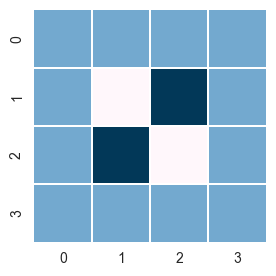

player 1 (WHITE): enter a move: 3,1


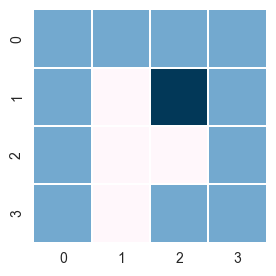

player 2 (BLACK): enter a move: 3,0


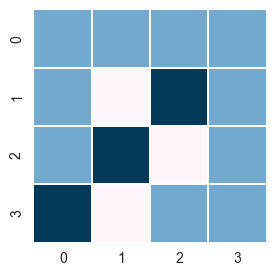

player 1 (WHITE): enter a move: 2,0


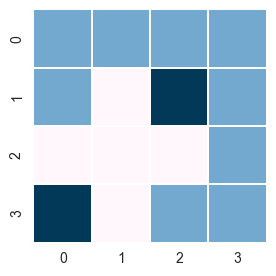

player 2 (BLACK): enter a move: 1,0


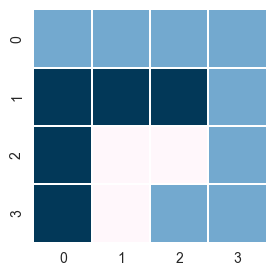

player 1 (WHITE): enter a move: 0,0


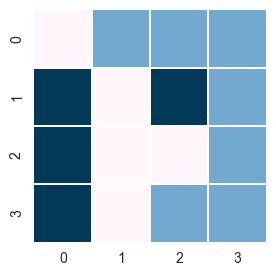

player 2 (BLACK): enter a move: 0,2


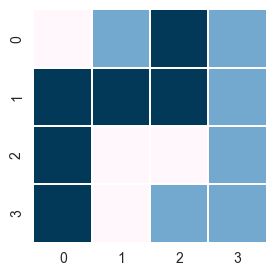

player 1 (WHITE): enter a move: 0,1


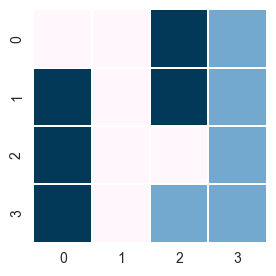

player 2 (BLACK): enter a move: 3,2


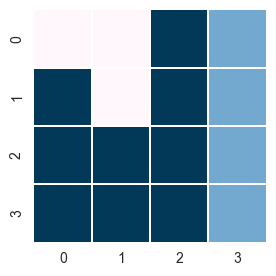

player 1 (WHITE): enter a move: 3,3


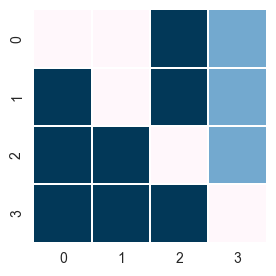

player 2 (BLACK): enter a move: 1,3


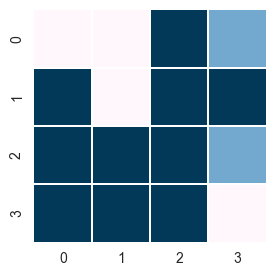

player 1 (WHITE): enter a move: 0,3


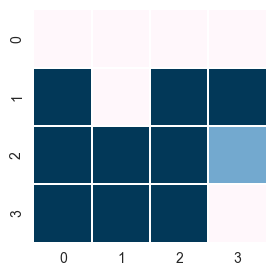


-- player 2 (BLACK) has no place to go!

player 1 (WHITE): enter a move: 2,3


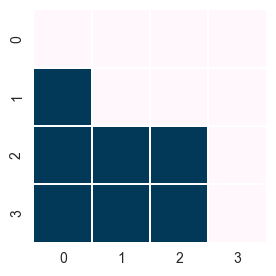


| The game is over.
| 9 white stones for player 1.
| 7 black stones for player 2.
| player 1 has won the game!


In [18]:
A = othello(4)  #change 4 to any number greater or equal to 3, gives the size of the board

## 7.9 cicular array

## 7.10 minesweeper

## 7.11 file system

## 7.12 hash table